<a href="https://colab.research.google.com/github/deqiangwang123/3253-Machine-Learning/blob/main/Week3_Binary_Classification_Deqiang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#MNIST

In [3]:
# from functools import cache
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)

mnist["data"], mnist["target"]


(       pixel1  pixel2  pixel3  pixel4  ...  pixel781  pixel782  pixel783  pixel784
 0         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 1         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 2         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 3         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 4         0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 ...       ...     ...     ...     ...  ...       ...       ...       ...       ...
 69995     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 69996     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 69997     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 69998     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0       0.0
 69999     0.0     0.0     0.0     0.0  ...       0.0       0.0       0.0   

In [4]:
type(mnist)

sklearn.utils.Bunch

In [5]:
type(mnist.data)

pandas.core.frame.DataFrame

In [6]:
mnist.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [7]:
mnist.data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001800,0.006714,0.003086,0.000129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000229,0.001329,0.011329,0.023071,0.043229,0.062243,0.117929,0.171243,...,3.572529,2.597929,1.659614,0.992457,0.541814,0.245643,0.080957,0.021000,0.000829,0.000843,0.0,0.0,0.0,0.0,0.0,0.0,0.002171,0.013357,0.036000,0.082671,0.122586,0.187657,0.310871,0.394871,0.495457,0.571071,0.669500,0.589571,0.479229,0.333600,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.440064,1.260218,0.816403,0.034017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060474,0.230432,1.322745,2.029539,2.951033,3.242019,4.820413,5.677191,...,26.274268,22.238669,17.840756,13.744477,10.299782,6.699808,3.631055,1.638692,0.136380,0.222999,0.0,0.0,0.0,0.0,0.0,0.0,0.405072,1.593527,2.409111,3.872385,4.709048,6.022443,7.421689,8.660856,9.605280,10.274678,11.236708,10.501991,9.448936,7.921717,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [8]:
X,y = mnist["data"],mnist["target"]

In [9]:
X.shape

(70000, 784)

In [10]:
type(X)

pandas.core.frame.DataFrame

In [11]:
X = mnist.data

In [12]:
type(X)

pandas.core.frame.DataFrame

In [13]:
X.shape

(70000, 784)

# An example

In [14]:
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap=mpl.cm.binary,
             interpolation="nearest")
  plt.axis("off")

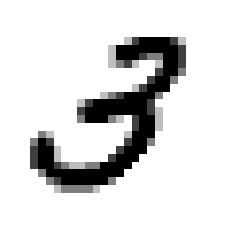

In [15]:
some_digit = X.iloc[7655].values
plot_digit(some_digit)

plot X[45]

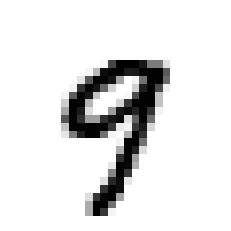

In [16]:
some_digit = X.iloc[45].values
plot_digit(some_digit)

In [17]:
y[45]

9

#Split dataset to train and test

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
print(X_train.shape, X_test.shape)
y_train.shape, y_test.shape

(56000, 784) (14000, 784)


((56000,), (14000,))

#Binary Classifier

In [20]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
y_train_5

47339     True
67456    False
12308    False
32557    False
664      False
         ...  
37194    False
6265     False
54886    False
860      False
15795    False
Name: class, Length: 56000, dtype: bool

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

True


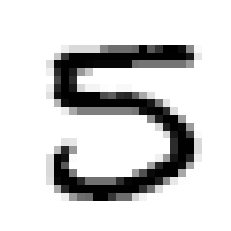

In [23]:
plot_digit(X_train.iloc[11].values)
print(y_train_5[11])

In [24]:
pred = sgd_clf.predict([X_train.iloc[11]])
pred

# the output is an array, input has to be array



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [25]:
pred = sgd_clf.predict(X_train)
pred



array([ True, False,  True, ..., False, False, False])

In [26]:
type(X_train)

pandas.core.frame.DataFrame

In [27]:
type(X_train.iloc[11])

pandas.core.series.Series

In [28]:
type([X_train.iloc[11]])

list

# Cross validation
cross validation is for check if the data is representive and shuffled enough, or model too simple or not

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91230514, 0.93930466, 0.95912354])

it looks like the data is not shuffled enough

In [30]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=3, random_state=42, shuffle=True) # define a split to be used, not split but k fold
for train_index, test_index in skfold.split(X_train, y_train_5): # split the X_train based on the distribution of y_train_5 then 5 and not 5 will be 10%:90%, otherwise the probability is random
  clone_clf = clone(sgd_clf) # not only split but also score is needed so clone is necessary for fitting different models
  X_train_folds = X_train.iloc[train_index]
  y_train_folds = y_train_5.iloc[train_index]
  X_test_folds = X_train.iloc[test_index]
  y_test_folds = y_train_5.iloc[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  n_corr = sum(y_pred == y_test_folds)
  print(n_corr/len(y_test_folds))

0.9563400653559758
0.9442331386939519
0.9573556198435659


# Use a baseline estimation


In [31]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self,X):
    return np.zeros((len(X), 1), dtype=bool)


In [32]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91107302, 0.90914448, 0.90978249])

In [33]:
np.unique(y_train_5, return_counts=True) # return unique elements and how many times for repeat

(array([False,  True]), array([50960,  5040]))

In [34]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [35]:
X_train.shape

(56000, 784)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[48161,  2799],
       [  734,  4306]])

In [37]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=10)

In [38]:
confusion_matrix(y_train_5, y_train_pred)

array([[50381,   579],
       [ 1588,  3452]])

Precision

In [42]:
# from all the positive predictions, how much is the true positive
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8563631853138179

Recall

In [41]:
# from all the positive cases, how many of them are predicted as positive
recall_score(y_train_5, y_train_pred)

0.6849206349206349

F1 score

In [44]:
f1_score(y_train_5, y_train_pred)

0.7611068239444384

# what is best precision recall ratio?

In [45]:
# decision_function for classificaiton
y_scores = sgd_clf.decision_function([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [46]:
y_scores

array([-218950.62172961])

In [47]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)

In [48]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [49]:
y_scores

array([ 265425.24207452, -558338.1328935 ,   54460.27276768, ...,
       -350807.9593845 , -212873.93724978, -575783.52807192])

In [50]:
y_scores.shape

(56000,)

In [51]:
y_scores = sgd_clf.decision_function(X_train)

In [52]:
y_scores

array([   5963.20358648, -363746.26157173,   67327.05185641, ...,
        -79483.86206143, -247685.13679906, -433566.97267746])

#Plot Precision Recall ratio

In [53]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

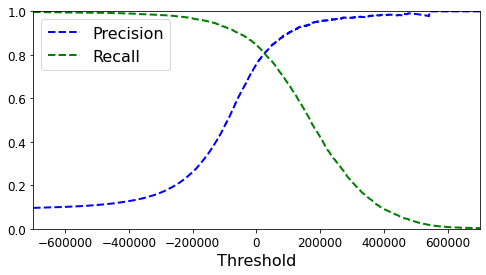

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1],"b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1],"g--", label="Recall", linewidth=2)
  plt.xlabel("Threshold", fontsize=16)
  plt.legend(loc="upper left", fontsize=16)
  plt.ylim([0,1])
  plt.xlim([-700000, 700000])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [57]:
# good threshold is 70000
thres = 70000
y_train_pred_good = (y_scores > thres)

precision_score(y_train_5, y_train_pred_good)


0.8687012065294535

In [58]:
recall_score(y_train_5, y_train_pred_good)

0.7285714285714285

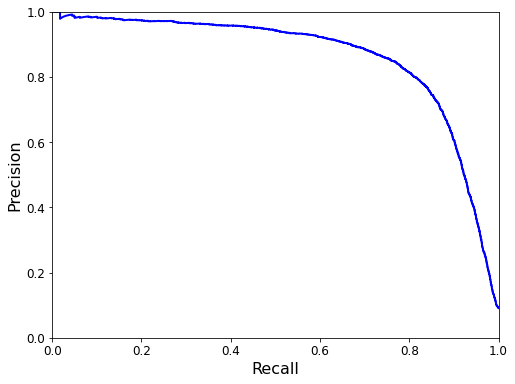

In [59]:
def plot_precision_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0,1,0,1])

plt.figure(figsize=(8,6))
plot_precision_recall(precisions, recalls)
plt.show()

#ROC curve

In [60]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


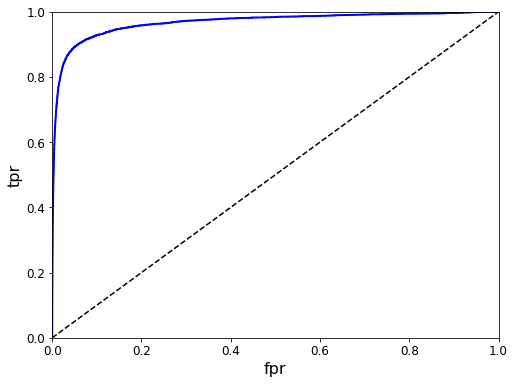

In [64]:
def plot_roc(fpr, tpr):
  plt.plot(fpr, tpr, "b-", linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel("fpr", fontsize=16)
  plt.ylabel("tpr", fontsize=16)
  plt.axis([0,1,0,1])

plt.figure(figsize=(8,6))
plot_roc(fpr,tpr)
plt.show()

In [66]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9673272610326181

In [67]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

# maybe there is no decision function for RandomForest so have to use method to get scores
y_preb_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                  method="predict_proba")

In [68]:
y_preb_forest

array([[0.3, 0.7],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [70]:
y_scores_forest = y_preb_forest[:, 1] # score = proba of positive class

In [71]:
y_scores_forest

array([0.7, 0. , 0. , ..., 0. , 0. , 0. ])

In [72]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [73]:
roc_auc_score(y_train_5, y_scores_forest)

0.992434493829583

In [74]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.984225621414914

In [75]:
recall_score(y_train_5, y_train_pred_forest)

0.817063492063492

In [76]:
confusion_matrix(y_train_pred_forest,y_train_5)

array([[50894,   922],
       [   66,  4118]])